In [ ]:
#install pacakages
#!pip install seaborn
%pip install seaborn

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import os
os.getcwd()

'/drive/notebooks'

In [133]:
#Load data
data = pd.read_csv('Housing.csv')

## Exploratory Analysis (EDA)

In [61]:
data.head(3)               
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int8 
 7   basement          545 non-null    int8 
 8   hotwaterheating   545 non-null    int8 
 9   airconditioning   545 non-null    int8 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int8 
 12  furnishingstatus  545 non-null    int8 
dtypes: int32(1), int64(6), int8(6)
memory usage: 30.9 KB


(545, 13)

In [60]:
#Checking for missing values
data.isnull().sum() #counts missing values
data.isna().any()  #chceks for missing values 
data.isna().all()
data.isnull().sum().any()

False

In [62]:
#Data types: Converting categorical data to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.astype('category').cat.codes)

##Option 2: Creating a function
def convert_to_numeric(series):
    return series.astype('category').cat.codes
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_cols] = data[categorical_cols].apply(lambda x: convert_to_numeric(x))

##Option 3: Using sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
data['mainroad'] = LabelEncoder().fit_transform(data['mainroad'])

##Option 4: Using pandas
data['guestroom'] = pd.Categorical(data['guestroom']).codes
data.head(2)

##Option 5: Using a For loop
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].astype('category')

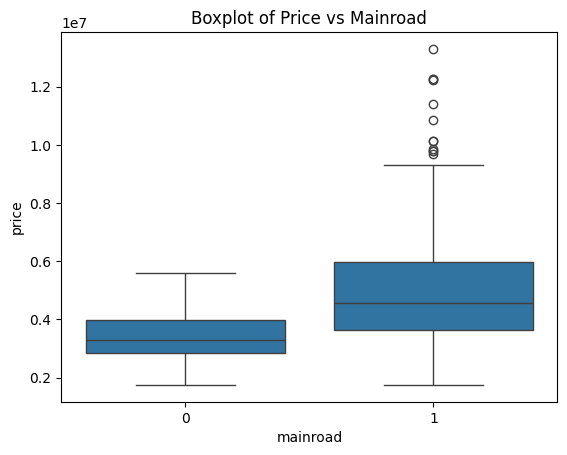

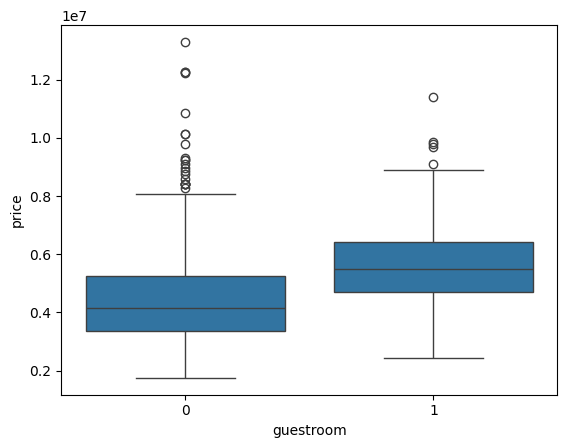

In [93]:
# Boxplots for categorical variables
#Using seaborn for individual boxplots
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.title('Boxplot of Price vs Mainroad')
plt.show()

sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.show()

#sns.boxplot(x = 'basement', y = 'price', data = data)
#plt.show()

#sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
#plt.show()

#sns.boxplot(x = 'airconditioning', y = 'price', data = data)
#plt.show()

#sns.boxplot(x = 'prefarea', y = 'price', data = data)
#plt.show()

#sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
#plt.show()

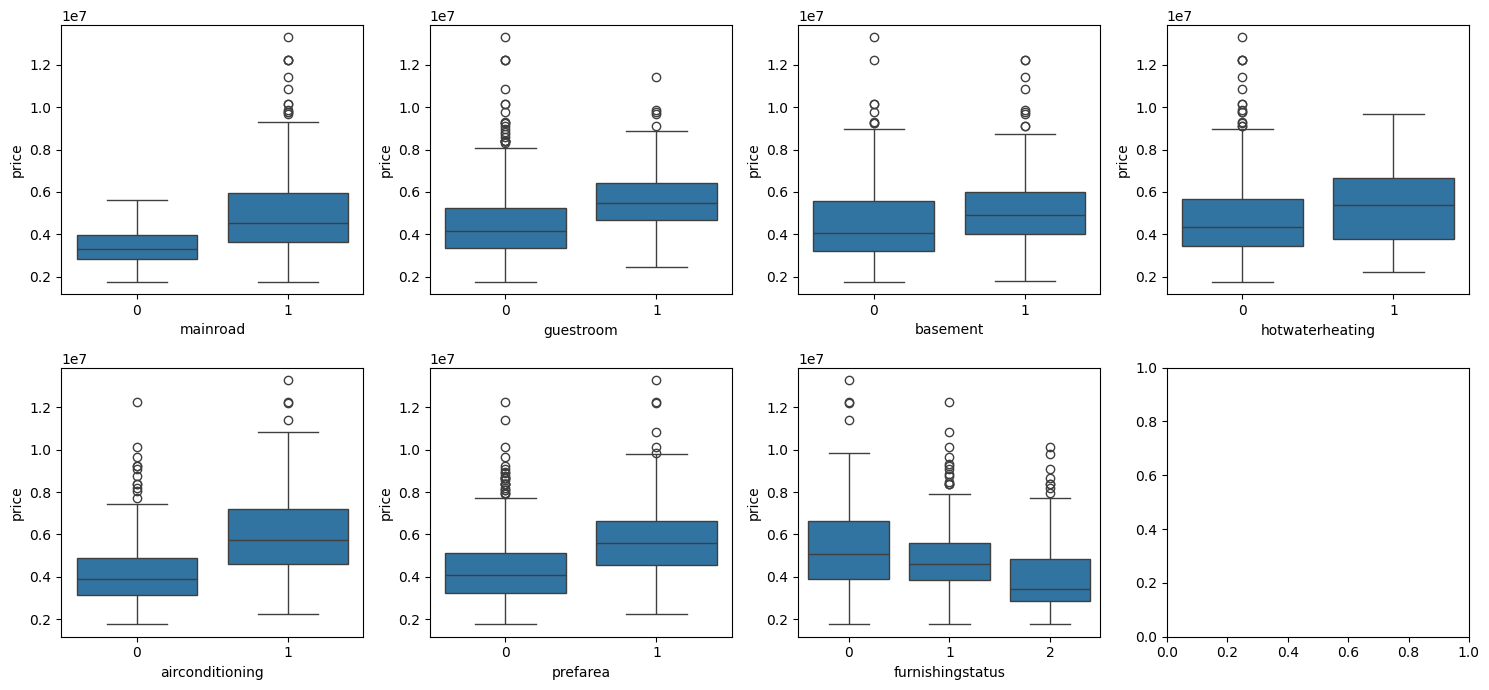

In [94]:
# Boxplots for categorical variables
#Using seaborn and matplotlib.pyplot for subplots boxplots

fig, axes = plt.subplots(2, 4, figsize = (15, 7))
for ax, i in zip(axes.flatten(), categorical_cols):
    sns.boxplot(x = data[i], y = data['price'], ax=ax)
plt.tight_layout()

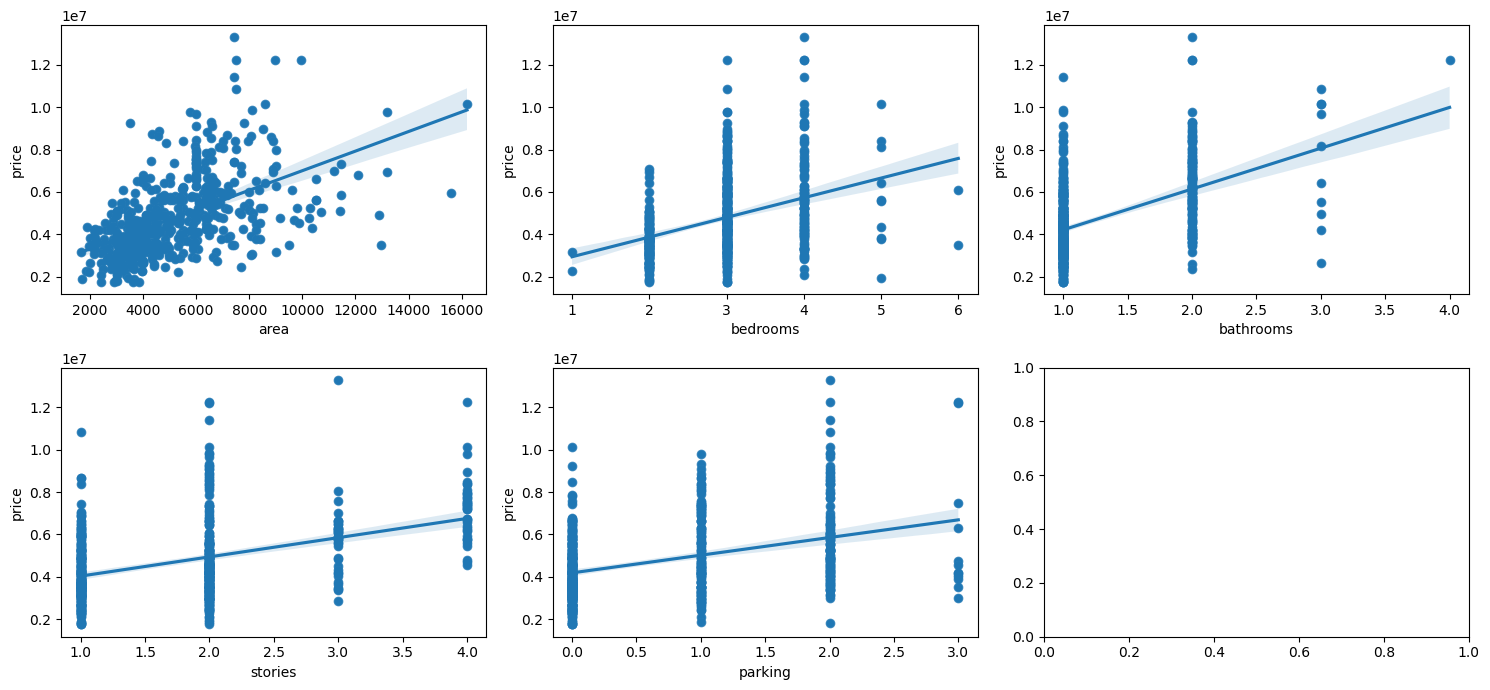

In [109]:
# Scatterplots for quantitative variables
quantitative_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(2, 3, figsize = (15, 7))
for ax, i in zip(axes.flatten(), quantitative_cols):
    sns.scatterplot(x = data[i], y = data['price'], ax=ax)
    sns.regplot(x = data[i], y = data['price'], ax=ax)
plt.tight_layout()

In [120]:
# Correlation matrix
data.corr()['price']
data.corr()['price'].sort_values(ascending = False)

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64

## Regression Analysis

In [130]:
#Split data
train_data, test_data = train_test_split(data, test_size = 0.3, random_state=123)
print(train_data.shape)
print(test_data.shape)

(381, 13)
(164, 13)


In [143]:
#Fit Linear regression model
def fit_model(data, formula):
    model = sm.OLS.from_formula(formula, data = data).fit()
    return model

full_model = fit_model(train_data, 'price ~ area + bedrooms + bathrooms + stories + parking + mainroad + guestroom + basement + hotwaterheating + airconditioning + prefarea + furnishingstatus')
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     71.39
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.66e-88
Time:                        12:30:33   Log-Likelihood:                -5811.1
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     368   BIC:                         1.170e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.284e+05   2.98e+05  

In [ ]:
#Reduced model 
reduced_model = fit_model(train_data, 'price ~ area')
print(reduced_model.summary())